In [1]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.chdir("C://Users//Jacopo//Downloads//ADM")

In [162]:
import json
import itertools

# Specifica il percorso del tuo file JSON di input e il percorso del nuovo file JSON di output
input_file = 'lighter_books.json'
output_file = 'lighter_books_new.json'

# Numero di righe da estrarre
num_lines_to_extract = 100000

with open(input_file, 'r') as in_file, open(output_file, 'w') as out_file:
    # Usa itertools.islice per leggere solo le prime num_lines_to_extract righe dal file JSON
    selected_lines = itertools.islice(in_file, num_lines_to_extract)

    # Scrivi le righe selezionate nel nuovo file JSON
    out_file.writelines(selected_lines)

In [163]:
df_1 = pd.read_json('lighter_authors.json', lines = True)
df_2 = pd.read_json('lighter_books_new.json', lines = True)
df_1.info()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351767 entries, 0 to 351766
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ratings_count       351767 non-null  int64  
 1   average_rating      351767 non-null  float64
 2   text_reviews_count  351767 non-null  int64  
 3   work_ids            351767 non-null  object 
 4   book_ids            351767 non-null  object 
 5   works_count         351767 non-null  int64  
 6   id                  351767 non-null  int64  
 7   name                351767 non-null  object 
 8   gender              351767 non-null  object 
 9   image_url           351767 non-null  object 
 10  about               351767 non-null  object 
 11  fans_count          351767 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 32.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99984 entries, 0 to 99983
Data columns (total 26 columns):
 #   Column      

In [161]:
df_1 = df_1.drop(['image_url','about'], axis = 1, inplace=True)

df_2 = df_2.drop(['description','image_url','edition_information','publisher','isbn','isbn13','asin'], axis = 1, inplace=True)
df_2.info()
#percorso_file_json = 'C://Users//Jacopo//Downloads//ADM'
#df_3.to_json(percorso_file_json, orient='records', lines=True)

KeyError: "['image_url', 'about'] not found in axis"

In [ ]:
#preliminar operations

In [ ]:
#check the feature of the content of the column authors to see what there is inside the dictionaries
first_row = df_2['authors'].iloc[0]
if isinstance(first_row, list) and len(first_row) > 0 and isinstance(first_row[0], dict):
    # Stampa il contenuto del primo dizionario nella lista
    first_dict = first_row[0]
    for key, value in first_dict.items():
        print(f"Key: {key}, Value: {value}")
else:
    print("La prima riga della colonna 'authors' non contiene un dizionario valido.")

#check the feature of the content of the column shelves to see what there is inside the dictionaries
first_row = df_2['shelves'].iloc[0]
if isinstance(first_row, list) and len(first_row) > 0 and isinstance(first_row[0], dict):
    # Stampa il contenuto del primo dizionario nella lista
    first_dict = first_row[0]
    for key, value in first_dict.items():
        print(f"Key: {key}, Value: {value}")
else:
    print("La prima riga della colonna 'authors' non contiene un dizionario valido.")

In [25]:
#through this code we understood that the values of the column id of df_1 are equal to the values of the column author_id of df_2
sk = df_1.loc[df_1['name'] == 'Stephen King', ['id', 'name']]
print(sk)

        id          name
1017  3389  Stephen King


In [35]:
#code to link the 2 datasets
df_2['author_id'] = df_2['author_id'].astype(object)
df_1['id'] = df_1['id'].astype(object)
merged_df = df_1.merge(df_2, left_on='id', right_on='author_id', how='inner')
m_df = merged_df[['title','id_x','author_id','text_reviews_count_y']]
print(m_df)

                                                   title      id_x author_id  \
0      The Hitchhiker's Guide to the Galaxy (Hitchhik...         4         4   
1      The Ultimate Hitchhiker's Guide: Five Complete...         4         4   
2      The Ultimate Hitchhiker's Guide to the Galaxy ...         4         4   
3      The Hitchhiker's Guide to the Galaxy (Hitchhik...         4         4   
4      The Hitchhiker's Guide to the Galaxy (Hitchhik...         4         4   
...                                                  ...       ...       ...   
99979                               Musical Elaborations  16770310  16770310   
99980  The Politics of Dispossession: The Struggle fo...  16770310  16770310   
99981                  Humanism and Democratic Criticism  16770310  16770310   
99982                Representations of the Intellectual  16770310  16770310   
99983                          The Road from Chapel Hill  16777019  16777019   

       text_reviews_count_y  
0        

In [ ]:
#RQ2

In [12]:
#RQ2.1
#reduce the dataset into a smaller version with just 3 columns
df_rq21 = df_2[['title', 'author_id', 'work_id','author_name']]
df_rq21 = df_rq21.drop_duplicates()

author_books_count = df_rq21.groupby('author_id').agg({'work_id':'count', 'author_name':'first'}).reset_index()
author_books_count.rename(columns={'work_id': 'num_books', 'author_name':'author_name'}, inplace=True)
author_books_count = author_books_count.sort_values(by='num_books', ascending=False)
print(author_books_count)

"""
author_3389 = df_rq21[df_rq21['author_id'] == 3389]
# Stampare i titoli dell'autore con 'author_id' 3389
titles = author_3389['title'].tolist()
for title in titles:
    print(title)
"""

      author_id  num_books      author_name
810        3389         88     Stephen King
2032       8516         87    Piers Anthony
1329       5472         55     David Burnie
651        2687         55      Dan Simmons
1352       5561         53     Dick Francis
...         ...        ...              ...
1248       5132          1      Kate Chopin
1247       5131          1     Gus Van Sant
1246       5128          1      Peter Kuper
1243       5113          1   Daniel Raeburn
2926   20864725          1  Harry    Cooper

[2927 rows x 3 columns]


"\nauthor_3389 = df_rq21[df_rq21['author_id'] == 3389]\n# Stampare i titoli dell'autore con 'author_id' 3389\ntitles = author_3389['title'].tolist()\nfor title in titles:\n    print(title)\n"

In [44]:
#RQ2.2
import numpy as np
index = np.argmax(df_2['text_reviews_count'])
max_text_reviews_count = df_2['text_reviews_count'].iloc[index]
max_title = df_2['title'].iloc[index]
print(max_text_reviews_count)
print(max_title)

116930
Harry Potter and the Sorcerer's Stone (Harry Potter, #1)


In [48]:
#RQ2.3
#si potrebbero mettere in relazione al numero totale di recensioni, per prendere i valori che davvero hanno lo score più alto
df_highest_avg_score = df_2.nlargest(10, 'average_rating')
x = df_highest_avg_score['average_rating']
y = df_highest_avg_score['title']
print(x,y)

178     5.0
386     5.0
653     5.0
671     5.0
721     5.0
762     5.0
1101    5.0
1120    5.0
1213    5.0
1252    5.0
Name: average_rating, dtype: float64 178     Later Letters of Edward Lear to Chichester For...
386                       Lord of the Flies Activity Pack
653                                            Bernie Mac
671     Delaware 1638-1776 (Voices from Colonial America)
721     Simply Italian: 100 Easy-To-Make, Zesty, Satis...
762                                      Rudolph Giuliani
1101             Singers, Heroes, and Gods in the Odyssey
1120    Fanaroff and Martin's Neonatal-Perinatal Medic...
1213                                     A Den Of Thieves
1252    Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...
Name: title, dtype: object


In [49]:
df_highest_avg_score = df_2.nsmallest(10, 'average_rating')
x = df_highest_avg_score['average_rating']
y = df_highest_avg_score['title']
print(x,y)

526     0.0
527     0.0
530     0.0
570     0.0
571     0.0
654     0.0
772     0.0
780     0.0
816     0.0
1017    0.0
Name: average_rating, dtype: float64 526                                    A More Perfect Way
527                                        Fields of Gold
530                  Justitiemord: Fallet Keith Cederholm
570                       The Rain Falls Like Rain: Poems
571                       The Rain Falls Like Rain: Poems
654     Riches in Real Estate: A Beginner's Guide to G...
772     J.K.Lasser Pro Real Estate Investment Trusts: ...
780                        Juiced Official Strategy Guide
816     The Platonism of Marsilio Ficino: A Study of H...
1017     The Nightingale Question: Five Poets from Saxony
Name: title, dtype: object


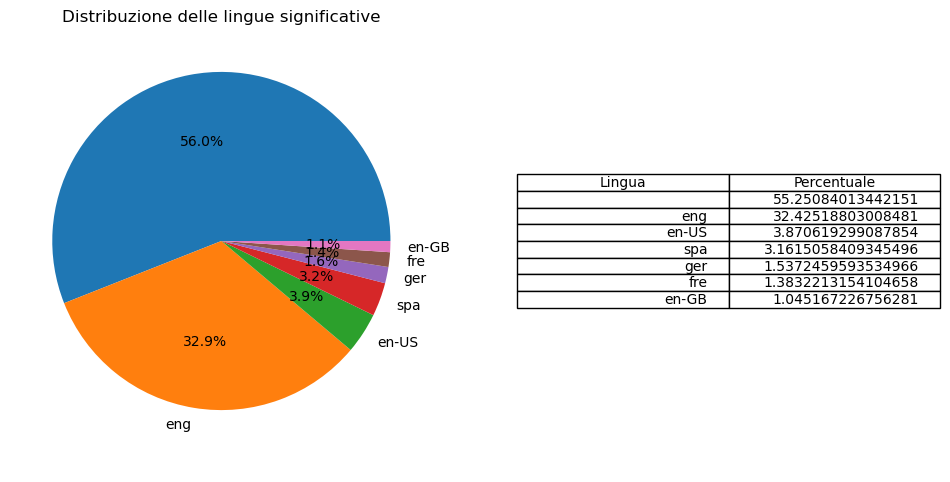

In [56]:
#RQ2.4
language_counts = df_2['language'].value_counts()
soglia_percentuale = 1  # Esempio: consideriamo solo lingue con almeno il 2% delle occorrenze
lingue_significative = language_counts[language_counts / language_counts.sum() * 100 >= soglia_percentuale]
tabella_df = pd.DataFrame({'Lingua': lingue_significative.index, 'Percentuale': lingue_significative.values / language_counts.sum() * 100})
plt.figure(figsize=(12, 6))

# Grafico a torta
plt.subplot(121)
plt.pie(lingue_significative, labels=lingue_significative.index, autopct='%1.1f%%')
plt.title("Distribuzione delle lingue significative")

# Tabella
plt.subplot(122)
plt.axis('off')  # Nasconde gli assi
plt.table(cellText=tabella_df.values, colLabels=tabella_df.columns, loc='center')
plt.show()

In [61]:
#RQ2.5
df_2['num_pages'] = pd.to_numeric(df_2['num_pages'], errors='coerce')
df_pages = df_2[df_2['num_pages'] >= 250]
print(len(df_pages))

41697


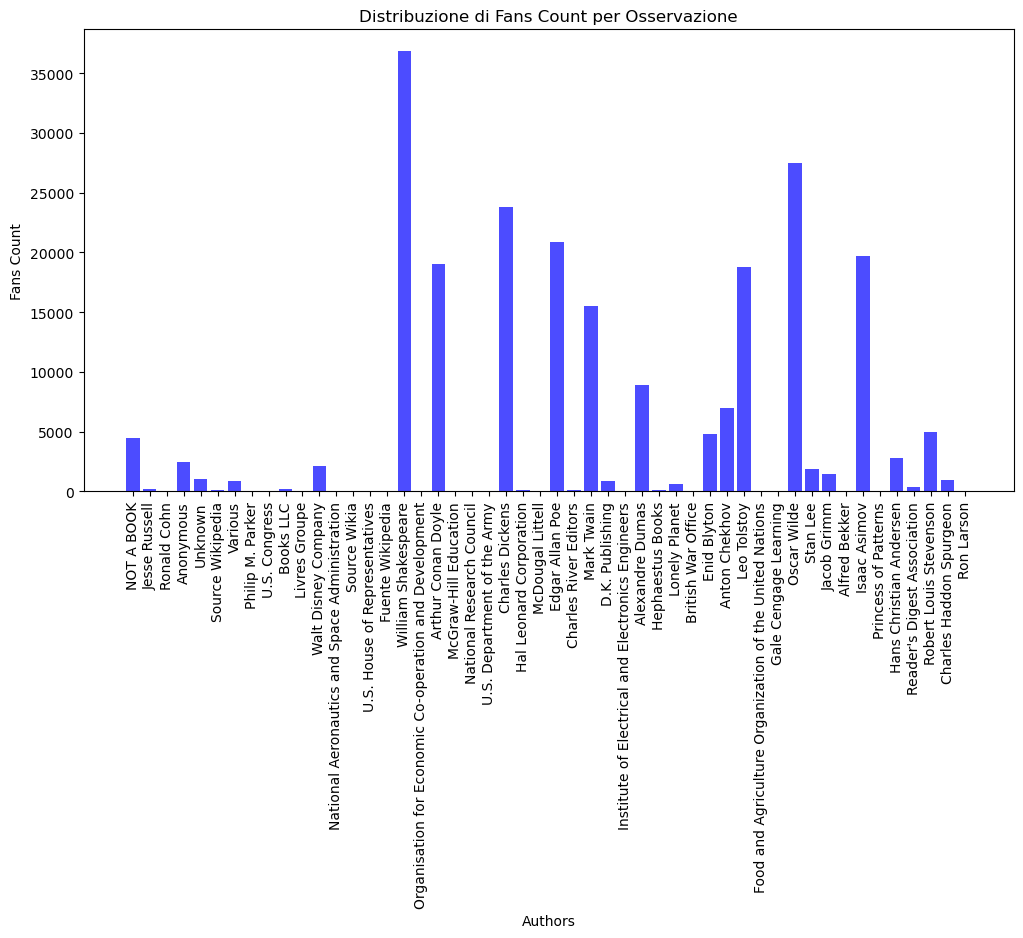

In [65]:
#RQ2.6
#we suppose that work_counts stands for the number of books written by that author
df_prolific_authors = df_1.nlargest(50, 'works_count')
fans_count = df_prolific_authors['fans_count']
authors = df_prolific_authors['name']

# Crea un grafico a barre
plt.figure(figsize=(12, 6))
plt.bar(authors, fans_count, color='blue', alpha=0.7)
plt.xlabel('Authors')
plt.ylabel('Fans Count')
plt.title('Distribuzione di Fans Count per Osservazione')
plt.xticks(rotation=90)  # Ruota le etichette sull'asse x per una migliore leggibilità
plt.show()

In [8]:
import json
import itertools

# Specifica il percorso del tuo file JSON di input e il percorso del nuovo file JSON di output
input_file = 'lighter_books.json'
output_file = 'lighter_books_experiment.json'

# Numero di righe da estrarre
num_lines_to_extract = 10

with open(input_file, 'r') as in_file, open(output_file, 'w') as out_file:
    # Usa itertools.islice per leggere solo le prime num_lines_to_extract righe dal file JSON
    selected_lines = itertools.islice(in_file, num_lines_to_extract)

    # Scrivi le righe selezionate nel nuovo file JSON
    out_file.writelines(selected_lines)

In [11]:
df_experiment = pd.read_json('lighter_books_experiment.json', lines = True)
df_experiment['publication_date']

0       2004-09
1    2003-11-01
2    2003-11-01
3    2004-05-01
4    2002-09-28
5    2006-09-01
6    2004-09-13
7    2005-09-12
8          2005
9    2005-11-01
Name: publication_date, dtype: object

In [24]:
df_rq3 = df_2[['title','num_pages','publication_date']]
df_rq3.loc[:,'publication_date'] = pd.to_datetime(df_rq3['publication_date'], errors='coerce')
mask = (df_rq3['publication_date'].dt.year <= 2023) | (df_rq3['publication_date'].isnull())
df_filtered = df_rq3[mask]
df_filtered = df_filtered.dropna()

C:\Users\Jacopo\AppData\Local\Temp\ipykernel_13180\4214124469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rq3.loc[:,'publication_date'] = pd.to_datetime(df_rq3['publication_date'], errors='coerce')
C:\Users\Jacopo\AppData\Local\Temp\ipykernel_13180\4214124469.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_rq3.loc[:,'publication_date'] = pd.to_datetime(df_rq3['publication_date'], errors='coerce')


In [116]:
#RQ3.1
import calendar


df_rq3 = df_2[['title','num_pages','publication_date']]
df_rq3.loc[:,'publication_date'] = pd.to_datetime(df_rq3['publication_date'], errors='coerce')
mask = (df_rq3['publication_date'].dt.year <= 2023) | (df_rq3['publication_date'].isnull())
df_rq3 = df_rq3[mask]
df_rq3 = df_rq3.dropna()
#df_rq3['Year'] = df_rq3['publication_date'].df_rq3.year
#df_rq3['Month'] = df_rq3['publication_date'].df_rq3.month
pd.to_datetime(df_rq3['publication_date'])
#df_rq3.grupby('publication_date')
#df_2.publication_date.apply(lambda row: row.year)

df_rq3['num_pages'] = pd.to_numeric(df_rq3['num_pages'], errors='coerce')

#print(df_rq3[df_rq3['num_pages'] == 0]) 
#Per ora non droppiamo le righe che hanno 0 come numero di pagine prima di fare fillna, 
#si ipotizza di sostituire questi valori con la media 
df_rq3['num_pages'] = df_rq3['num_pages'].fillna(0)   #we replace here NaN values with 0 to be able to run the following code

#df_rq3.info()   #sistemare floating point


/var/folders/c4/zpw_p5ls3fl74l16gzt_y7l00000gn/T/ipykernel_6513/387767614.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rq3.loc[:,'publication_date'] = pd.to_datetime(df_rq3['publication_date'], errors='coerce')
/var/folders/c4/zpw_p5ls3fl74l16gzt_y7l00000gn/T/ipykernel_6513/387767614.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_rq3.loc[:,'publication_date'] = pd.to_datetime(df_rq3['publication_date'], errors='coerce')


In [109]:
def rq3(year):
    if year in list(df_rq3['publication_date'].dt.year):
        df_filtered = df_rq3[df_rq3['publication_date'].dt.year == year]
        
        #books published in that year
        books_published = len(df_filtered) 

        #total number of pages written 
        pages_written = df_filtered['num_pages'].sum() 

        #most prolific month
        grouped = df_filtered.groupby(df_filtered['publication_date'].dt.month)
        monthly_counts = grouped['title'].count()
        most_prolific_month = calendar.month_name[monthly_counts.idxmax()]

        #longest book written in that year
        longest_book = df_filtered['title'][df_filtered['num_pages'].idxmax()]
        
        
        #print(books_published)
        #print(pages_written)
        #print(most_prolific_month)
        #print(longest_book)
        
        #output format:tuple
        return books_published, pages_written, most_prolific_month, longest_book
    else: 
        return 0, 0, 0, 0
    

In [110]:
rq3(1864)

(1,
 0.0,
 'January',
 'Forty Years of Pioneer Life: Memoir of John Mason Peck, D.D.')

In [143]:
#{'anno': [books_published, pages_written, most_prolific_month, longest_book]}

first_year = df_rq3['publication_date'].dt.year.min()
last_year = df_rq3['publication_date'].dt.year.max()

#print(first_year, last_year)

years = [ year for year in range(first_year, last_year + 1) if year in list(df_rq3['publication_date'].dt.year) ]

d = []
for year in years:
    attributes = rq3(year)
    d.append(
        {
            'books_published': attributes[0],
            'pages_written': attributes[1],
            'most_prolific_month':  attributes[2],
            'longest_book': attributes[3]
        }
    )

df_rq3_final = pd.DataFrame(d, index = years, columns= ['books_published', 'pages_written', 'most_prolific_month', 'longest_book'])

df_rq3_final.head(10), df_rq3_final.tail(10)  
#VEDIAMO SE RIUSCIAMO A FORMATTARLO 

(      books_published  pages_written most_prolific_month  \
 1824                1          994.0             January   
 1850                1          432.0             January   
 1859                1          216.0             January   
 1864                1            0.0             January   
 1880                1          319.0             January   
 1885                2          269.0             January   
 1888                2          433.0             January   
 1892                2          391.0             January   
 1898                1          711.0             January   
 1899                3         1608.0             January   
 
                                            longest_book  
 1824                                         Albigenses  
 1850  Lives Of James Madison & James Monroe (The Wor...  
 1859                                       Fairy Dreams  
 1864  Forty Years of Pioneer Life: Memoir of John Ma...  
 1880                           

In [117]:
# import pandas as pd
import pandas as pd
 
# list of strings
lst = ['Geeks', 'For', 'Geeks', 'is', 'portal', 'for', 'Geeks']
 
# Calling DataFrame constructor on list
# with indices and columns specified
df = pd.DataFrame(lst, index =['a', 'b', 'c', 'd', 'e', 'f', 'g'],
                                              columns =['Names'])
df

,Names
a,Geeks
b,For
c,Geeks
d,is
e,portal
f,for
g,Geeks


In [ ]:
d = []
for year in range(first_year, last_year + 1):
    attributes = rq3(year)
    d.append(
        {
            'books_published': attributes[0]
            'pages_written': attributes[1]
            'most_prolific_month':  attributes[2]
            'longest_book': attributes[3]
        }
    )

pd.DataFrame(d)

# RQ 4

In [160]:
#df_1 è author

#To check the eponymous we chek if there are authors with same name but different book ids 

df_2.info()

AttributeError: 'NoneType' object has no attribute 'info'